<a href="https://colab.research.google.com/github/neuranna/labels-and-categories/blob/master/Labels_%26_Categories_Method_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Plot exemplars

### Predefined exemplars

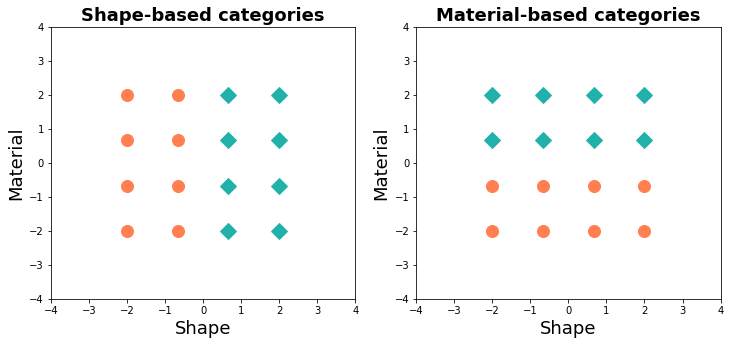

In [12]:
N_exemplars = 16    # total
N_categories = 2

# values within a single dimension are uniformly spaced
values_onedim = np.linspace(-2,2,num=int(math.sqrt(N_exemplars)))
dim1, dim2 = np.meshgrid(values_onedim, values_onedim)
dim1_all = dim1.flatten()
dim2_all = dim2.flatten()

cat1_shape = {'shape': dim2_all[0:N_exemplars//2], 
              'material': dim1_all[0:N_exemplars//2]}
cat2_shape = {'shape': dim2_all[N_exemplars//2:], 
              'material': dim1_all[N_exemplars//2:]}
cat1_material = {'shape': dim1_all[0:N_exemplars//2], 
                 'material': dim2_all[0:N_exemplars//2]}
cat2_material = {'shape': dim1_all[N_exemplars//2:], 
                 'material': dim2_all[N_exemplars//2:]}

# Plot the data
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(cat1_shape['shape'], cat1_shape['material'], 'o', markersize=12, c='coral', label='Approach (leebish)')
ax1.plot(cat2_shape['shape'], cat2_shape['material'], 'D', markersize=12, c='lightseagreen', label='Avoid (grecious)')
ax1.set_xlabel('Shape', fontsize=18)
ax1.set_ylabel('Material', fontsize=18)
ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)
_ = ax1.set_title('Shape-based categories', fontdict={'fontweight': 'bold', 'fontsize': 18})

ax2.plot(cat1_material['shape'], cat1_material['material'], 'o', markersize=12, c='coral', label='Approach (leebish)')
ax2.plot(cat2_material['shape'], cat2_material['material'], 'D', markersize=12, c='lightseagreen', label='Avoid (grecious)')
ax2.set_xlabel('Shape', fontsize=18)
ax2.set_ylabel('Material', fontsize=18)
ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)
_ = ax2.set_title('Material-based categories', fontdict={'fontweight': 'semibold', 'fontsize': 18})
#plt.savefig("/content/drive/My Drive/Research/Labels & Category Learning/our_stimuli.png")

### Perceived exemplars (example)

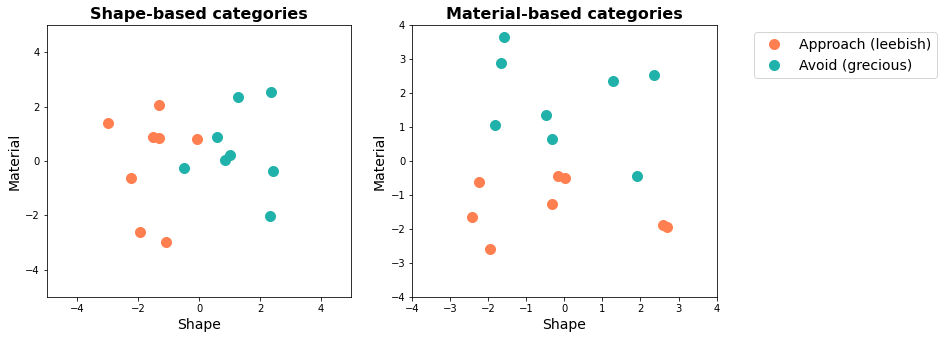

In [13]:
# add noise
np.random.seed(4)
noise_shape = np.random.normal(size=N_exemplars)
noise_material = np.random.normal(size=N_exemplars)

# Plot 
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(cat1_shape['shape'] + noise_shape[0:int(N_exemplars/2)], 
         cat1_shape['material'] + noise_material[0:int(N_exemplars/2)], 
         'o', markersize=10, c='coral', label='Approach (leebish)')
ax1.plot(cat2_shape['shape'] + noise_shape[int(N_exemplars/2):], 
         cat2_shape['material'] + noise_material[int(N_exemplars/2):], 
         'o', markersize=10, c='lightseagreen', label='Avoid (grecious)')
ax1.set_xlabel('Shape', fontsize=14)
ax1.set_ylabel('Material', fontsize=14)
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)
_ = ax1.set_title('Shape-based categories', fontdict={'fontweight': 'bold', 'fontsize': 16})

ax2.plot(cat1_material['shape'] + noise_shape[0:int(N_exemplars/2)], 
         cat1_material['material'] + noise_material[0:int(N_exemplars/2)], 
         'o', markersize=10, c='coral', label='Approach (leebish)')
ax2.plot(cat2_material['shape'] + noise_shape[int(N_exemplars/2):], 
         cat2_material['material'] + noise_material[int(N_exemplars/2):], 
         'o', markersize=10, c='lightseagreen', label='Avoid (grecious)')
ax2.set_xlabel('Shape', fontsize=14)
ax2.set_ylabel('Material', fontsize=14)
ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
_ = ax2.set_title('Material-based categories', fontdict={'fontweight': 'bold', 'fontsize': 16})

## Plot different model parameters

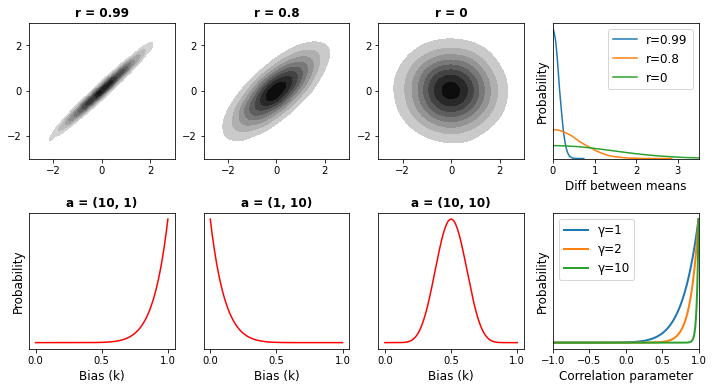

In [17]:
c_vals = [0.99, 0.8, 0]
b_vals = [0.1, 0.3, 0.5]
mu = np.zeros(2) 
fig = plt.figure(figsize=(12,6))

for i,c in enumerate(c_vals):
  cov = np.array([[1, c], 
                  [c, 1]])
  y = stats.multivariate_normal.rvs(mean=mu, cov=cov, size=10000)

  plt.subplot(2,len(c_vals)+1,i+1)
  sns.kdeplot(y[:,0], y[:,1], shade=True, color='k', shade_lowest=False, bw=b_vals[i])
  plt.xlim(-3,3)
  plt.ylim(-3,3)
  plt.xticks([-2,0,2])
  plt.yticks([-2,0,2])
  plt.title('r = ' + str(c), fontweight='bold')

plt.subplot(2,4,4)
for i,c in enumerate(c_vals):
  cov = np.array([[1, c], 
                  [c, 1]])
  y = stats.multivariate_normal.rvs(mean=mu, cov=cov, size=100000)
  sns.kdeplot(y[:,0]-y[:,1], shade=False, lw=1.5, label='r='+str(c))
plt.xlim(0,3.5)
#plt.ylim(0,3)
plt.ylabel('Probability', size=12)
plt.xlabel('Diff between means', size=12)
plt.yticks([])
plt.legend(fontsize=12)

x = np.linspace(0, 1, 10000)

plt.subplot(2,4,5)
a, b = 10, 1
plt.plot(x, beta.pdf(x, a, b),'r-')
plt.title('a = ('+str(a)+', '+str(b)+')', fontweight='bold')
plt.xlabel('Bias (k)', size=12)
plt.xticks([0,0.5,1])
plt.ylabel('Probability', size=12)
plt.yticks([])

plt.subplot(2,4,6)
a, b = 1, 10
plt.plot(x, beta.pdf(x, a, b),'r-', label='biased against')
plt.title('a = ('+str(a)+', '+str(b)+')', fontweight='bold')
plt.xlabel('Bias (k)', size=12)
plt.xticks([0,0.5,1])
plt.yticks([])

plt.subplot(2,4,7)
a, b = 10,10
plt.plot(x, beta.pdf(x, a, b),'r-', label='neutral')
plt.title('a = ('+str(a)+', '+str(b)+')', fontweight='bold')
plt.xlabel('Bias (k)', size=12)
plt.xticks([0,0.5,1])
plt.yticks([])

plt.subplot(2,4,8)
a, b = 1,10
sparsity=1
plt.plot((1-x)**(1/sparsity)*2-1, beta.pdf(x, a, b),'-', lw=2, label='γ='+str(sparsity))
sparsity=2
plt.plot((1-x)**(1/sparsity)*2-1, beta.pdf(x, a, b),'-', lw=2, label='γ='+str(sparsity))
sparsity=10
plt.plot((1-x)**(1/sparsity)*2-1, beta.pdf(x, a, b),'-', lw=2, label='γ='+str(sparsity))
plt.xlabel('Correlation parameter', size=12)
plt.ylabel('Probability', size=12)
plt.yticks([])
plt.xlim(-1,1)
plt.legend(fontsize=12)

plt.subplots_adjust(hspace=0.4)